In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from flydance.io.smart_loader import FlyData
from flydance.vr.neuser import NeuserParams
from flydance.vr.neuser import FollowBarWatch
import sys
import os
sys.path.append("/Users/ambra-stella/flydance/experiments")

In [2]:
flytrax_fname = "/Users/ambra-stella/bachelor/DATA/flytrax20210709_134608.csv"

In [3]:
pinwheel_fname = "/Users/ambra-stella/bachelor/DATA/pinwheel20210709_122626.csv"

In [4]:
neuser_fname = "/Users/ambra-stella/bachelor/DATA/neuser_20210709_134607.csv"

In [5]:
data = FlyData(flytrax_fname, pinwheel=pinwheel_fname, experiment_log=neuser_fname)
#data = FlyData(flytrax_fname, pinwheel=pinwheel_fname)

In [6]:
data.load_all_single_fly()

ver 0.9.0
time: [0.0, 1799.960590839386]
merging pinwheel data...
(53962, 27)
dropna: (53958, 27)


/Users/ambra-stella/opt/anaconda3/envs/flyvenv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3437: DtypeWarning: Columns (4,5,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [7]:
data?

Type:        FlyData
String form: <flydance.io.smart_loader.FlyData object at 0x7fa88234bf90>
File:        ~/flydance/flydance/io/smart_loader.py
Docstring:   <no docstring>


# CHANGE THE *NAME* BEFORE SAVING !! :

In [94]:
#data.df.to_csv("/Users/ambra-stella/bachelor/DATA/processed/smart_load20210709_134608.csv", index=False)

## Viewing paths 

In [69]:
fname = "/Users/ambra-stella/bachelor/DATA/processed/smart_load20210615_163947.csv"
df = pd.read_csv(fname)

In [70]:
df

,frame,Unnamed: 0,obj_id,timestamp,x,y,z,xvel,yvel,zvel,...,y_px,led_1,orientation_radians_mod_pi,ON,direction_change,area_change,area,direction,stopped,ntimes
0,337884,24,72,1.623768e+09,-0.010929,-0.080171,0.0,0.030504,0.012745,0.0,...,101.1,0.0,-0.144,0.0,True,True,center,1.0,False,0.0
1,337884,24,72,1.623768e+09,-0.010929,-0.080171,0.0,0.030504,0.012745,0.0,...,101.1,0.0,-0.144,0.0,True,True,right,0.0,False,0.0
2,337884,24,72,1.623768e+09,-0.010929,-0.080171,0.0,0.030504,0.012745,0.0,...,101.1,0.0,-0.144,0.0,True,False,right,2.0,False,0.0
3,337884,24,72,1.623768e+09,-0.010929,-0.080171,0.0,0.030504,0.012745,0.0,...,101.1,0.0,-0.144,0.0,True,True,center,1.0,False,0.0
4,337884,25,73,1.623768e+09,0.098767,0.011878,0.0,-0.000279,-0.002736,0.0,...,101.1,0.0,-0.144,0.0,True,True,center,1.0,False,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54795,391877,54198,72,1.623770e+09,0.028295,-0.008148,0.0,-0.002269,0.000190,0.0,...,470.3,0.0,-0.673,0.0,False,False,right,2.0,False,4.0
54796,391878,54199,72,1.623770e+09,0.028322,-0.008171,0.0,0.003759,-0.003480,0.0,...,470.1,0.0,-0.664,0.0,True,False,right,0.0,False,4.0
54797,391879,54200,72,1.623770e+09,0.028332,-0.008175,0.0,0.001951,-0.001021,0.0,...,470.2,0.0,-0.652,0.0,True,False,right,1.0,False,4.0
54798,391880,54201,72,1.623770e+09,0.028306,-0.008153,0.0,-0.003685,0.003270,0.0,...,470.3,0.0,-0.641,0.0,True,False,right,0.0,False,4.0


In [71]:
neuser_params = NeuserParams()
neuser_params.crossing_distance = 0.03
neuser_params.towards_delta_deg=20

In [72]:
df.columns #luminance is side of one_bar (1= bottom, 0= top)
#contrast is numb of bars

Index(['frame', 'Unnamed: 0', 'obj_id', 'timestamp', 'x', 'y', 'z', 'xvel',
       'yvel', 'zvel', 'P00', 'P01', 'P02', 'P11', 'P12', 'P22', 'P33', 'P44',
       'P55', 't', 'x_px', 'y_px', 'led_1', 'orientation_radians_mod_pi', 'ON',
       'direction_change', 'area_change', 'area', 'direction', 'stopped',
       'ntimes'],
      dtype='object')

In [73]:
df

,frame,Unnamed: 0,obj_id,timestamp,x,y,z,xvel,yvel,zvel,...,y_px,led_1,orientation_radians_mod_pi,ON,direction_change,area_change,area,direction,stopped,ntimes
0,337884,24,72,1.623768e+09,-0.010929,-0.080171,0.0,0.030504,0.012745,0.0,...,101.1,0.0,-0.144,0.0,True,True,center,1.0,False,0.0
1,337884,24,72,1.623768e+09,-0.010929,-0.080171,0.0,0.030504,0.012745,0.0,...,101.1,0.0,-0.144,0.0,True,True,right,0.0,False,0.0
2,337884,24,72,1.623768e+09,-0.010929,-0.080171,0.0,0.030504,0.012745,0.0,...,101.1,0.0,-0.144,0.0,True,False,right,2.0,False,0.0
3,337884,24,72,1.623768e+09,-0.010929,-0.080171,0.0,0.030504,0.012745,0.0,...,101.1,0.0,-0.144,0.0,True,True,center,1.0,False,0.0
4,337884,25,73,1.623768e+09,0.098767,0.011878,0.0,-0.000279,-0.002736,0.0,...,101.1,0.0,-0.144,0.0,True,True,center,1.0,False,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54795,391877,54198,72,1.623770e+09,0.028295,-0.008148,0.0,-0.002269,0.000190,0.0,...,470.3,0.0,-0.673,0.0,False,False,right,2.0,False,4.0
54796,391878,54199,72,1.623770e+09,0.028322,-0.008171,0.0,0.003759,-0.003480,0.0,...,470.1,0.0,-0.664,0.0,True,False,right,0.0,False,4.0
54797,391879,54200,72,1.623770e+09,0.028332,-0.008175,0.0,0.001951,-0.001021,0.0,...,470.2,0.0,-0.652,0.0,True,False,right,1.0,False,4.0
54798,391880,54201,72,1.623770e+09,0.028306,-0.008153,0.0,-0.003685,0.003270,0.0,...,470.3,0.0,-0.641,0.0,True,False,right,0.0,False,4.0


AttributeError: 'DataFrame' object has no attribute 'contrast'

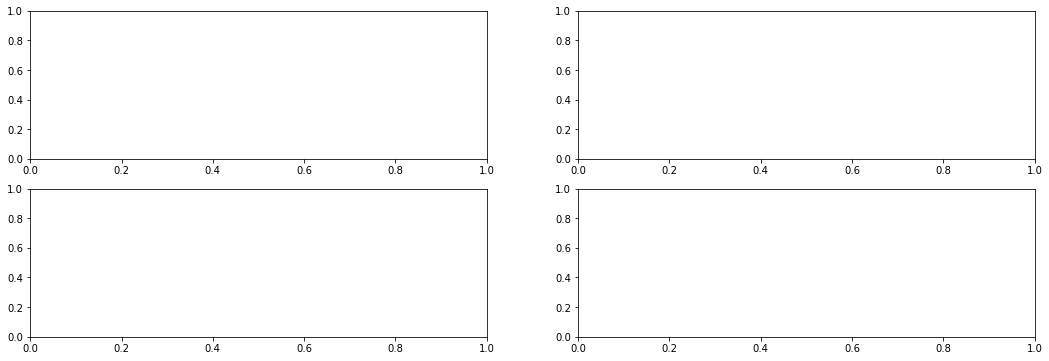

In [74]:
f, axs = plt.subplots(2,2,figsize=(18,6))


axs[0,0].plot(df.t, df.contrast)#contrast is numb of bars

axs[0,1].plot(df.t, df.luminance)

# plt.plot(df.t, df.center_x)
axs[1,0].plot(df.t, df.center_x.diff())
axs[1,0].plot(df.t, df.center_y.diff())

axs[1,1].plot(df.t, df.ntimes)

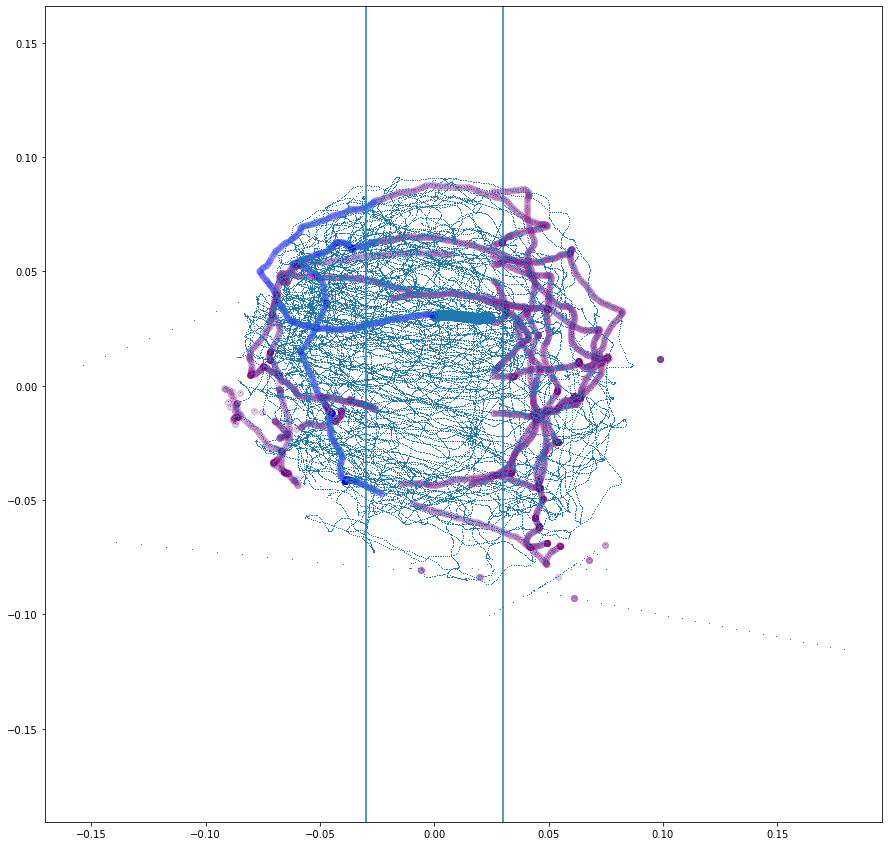

In [75]:
to_plot = df
# to_plot = joined.iloc[12000:20000]
plt.figure(figsize=(15,15))
# plt.plot(to_plot[to_plot.ON==1].x, to_plot[to_plot.ON==1].y, 'o', color="yellow")
plt.plot(to_plot[to_plot.ntimes==2].x, to_plot[to_plot.ntimes==2].y, 'o', color="blue", alpha=0.2)
plt.plot(to_plot[to_plot.ntimes==1].x, to_plot[to_plot.ntimes==1].y, 'o', color="purple", alpha=0.2)
plt.scatter(to_plot[to_plot.ntimes==3].x,to_plot[to_plot.ntimes==3].y, s=100)
plt.plot(to_plot.x, to_plot.y, ',')
plt.xlim(-0.1, 0.1)
plt.ylim(-0.1, 0.1)
# plt.plot(to_plot[to_plot.area=="center"].x, to_plot[to_plot.area=="center"].y, ',', color="green")
#plt.plot(to_plot[to_plot.direction==1].x,to_plot[to_plot.direction==1].y, '.', color="red") #right
#plt.plot(to_plot[to_plot.direction==2].x,to_plot[to_plot.direction==2].y, '.', color="green") #left
plt.axis('equal');
plt.axvline(neuser_params.crossing_distance)
plt.axvline(-neuser_params.crossing_distance)


In [76]:
df

,frame,Unnamed: 0,obj_id,timestamp,x,y,z,xvel,yvel,zvel,...,y_px,led_1,orientation_radians_mod_pi,ON,direction_change,area_change,area,direction,stopped,ntimes
0,337884,24,72,1.623768e+09,-0.010929,-0.080171,0.0,0.030504,0.012745,0.0,...,101.1,0.0,-0.144,0.0,True,True,center,1.0,False,0.0
1,337884,24,72,1.623768e+09,-0.010929,-0.080171,0.0,0.030504,0.012745,0.0,...,101.1,0.0,-0.144,0.0,True,True,right,0.0,False,0.0
2,337884,24,72,1.623768e+09,-0.010929,-0.080171,0.0,0.030504,0.012745,0.0,...,101.1,0.0,-0.144,0.0,True,False,right,2.0,False,0.0
3,337884,24,72,1.623768e+09,-0.010929,-0.080171,0.0,0.030504,0.012745,0.0,...,101.1,0.0,-0.144,0.0,True,True,center,1.0,False,0.0
4,337884,25,73,1.623768e+09,0.098767,0.011878,0.0,-0.000279,-0.002736,0.0,...,101.1,0.0,-0.144,0.0,True,True,center,1.0,False,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54795,391877,54198,72,1.623770e+09,0.028295,-0.008148,0.0,-0.002269,0.000190,0.0,...,470.3,0.0,-0.673,0.0,False,False,right,2.0,False,4.0
54796,391878,54199,72,1.623770e+09,0.028322,-0.008171,0.0,0.003759,-0.003480,0.0,...,470.1,0.0,-0.664,0.0,True,False,right,0.0,False,4.0
54797,391879,54200,72,1.623770e+09,0.028332,-0.008175,0.0,0.001951,-0.001021,0.0,...,470.2,0.0,-0.652,0.0,True,False,right,1.0,False,4.0
54798,391880,54201,72,1.623770e+09,0.028306,-0.008153,0.0,-0.003685,0.003270,0.0,...,470.3,0.0,-0.641,0.0,True,False,right,0.0,False,4.0


In [77]:
df[df.area=="left"].ON.value_counts()

0.0    17435
1.0        4
Name: ON, dtype: int64

In [78]:
df[df.area=="right"].ON.value_counts()

0.0    15952
1.0       17
Name: ON, dtype: int64

In [79]:
#plt.figure(figsize=(15,15))

#plt.plot(df[df.ON==1].x, df[df.ON==1].y, 'o', color="yellow")
##plt.plot(df[df.area_change==True].x, df[df.area_change==True].y, 'o', color="red", alpha=0.3)
#plt.plot(df[df.area_change==True].x, df[df.area_change==True].y, 'o', color="red")

#plt.plot(df.x, df.y, ',')
#plt.plot(df[df.area=="center"].x, df[df.area=="center"].y, ',', color="green")
#plt.plot(df[df.direction!=0].x,df[df.direction!=0].y, ',', color="red")
#plt.axis('equal');
#plt.axvline(neuser_params.crossing_distance)
#plt.axvline(-neuser_params.crossing_distance)

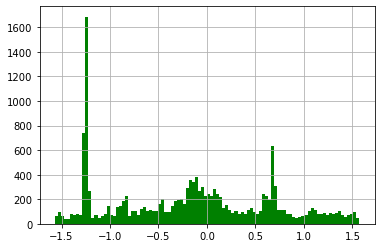

In [47]:
angle = df.orientation_radians_mod_pi
plt.hist(angle,100,  facecolor='g')
plt.grid(True)

# looking at turns 

In [48]:
len(df.ntimes == 3)

15621

# bar is on the TOP!!!

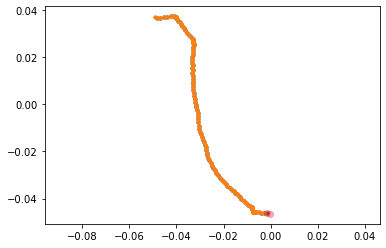

In [60]:

tstart = df[df.ntimes== 3].t + 0 
tstopp = df[df.ntimes== 3].t + 9


for t0,t1 in zip(tstart, tstopp):
    piece=df[(df.t>t0)&(df.t<t1)]
    plt.plot(piece.x, piece.y, '.')

plt.plot(df[df.ntimes== 3].x, df[df.ntimes== 3].y, 'o', color="red", alpha=0.3)
plt.axis('equal');

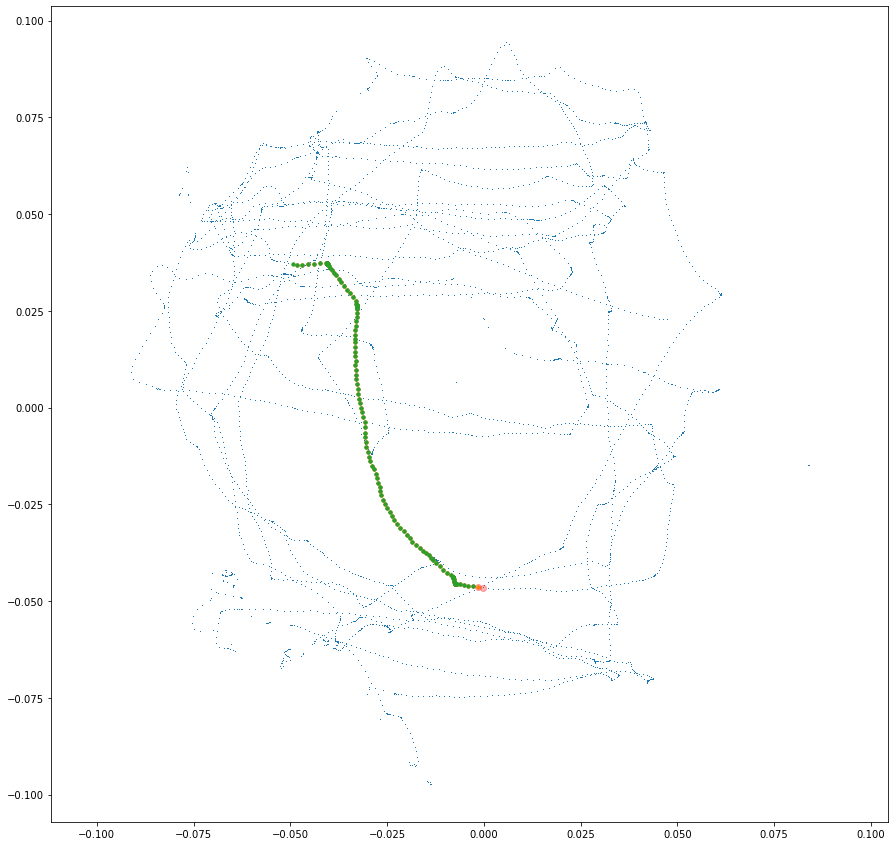

In [56]:
plt.figure(figsize=(15,15))
plt.plot(df.x, df.y, ',')
plt.plot(df[df.ntimes== 3].x, df[df.ntimes== 3].y, 'o', color="red", alpha=0.3)
for t0,t1 in zip(tstart, tstopp):
    piece=df[(df.t>t0)&(df.t<t1)]

    plt.plot(piece.x, piece.y, '.')
plt.xlim(-0.1, 0.1)
plt.ylim(-0.1, 0.1)
plt.axis('equal');
#plt.savefig('/Users/ambra-stella/bachelor/DATA/figures/20210617_124459.pdf')